<a href="https://colab.research.google.com/github/Harshit-Agarwal-007/Deep-Learning/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#loading the dataset
data = load_iris()

X = data.data
y = data.target

#prepare dataset
y= pd.get_dummies(y).values

In [110]:
#splitting data
xtrain , xtest, ytrain , ytest = train_test_split(X, y )



In [111]:
#initializeing hyperparameters and weights
lr = 0.001
iterations = 5000


#N = ytrain.shape[0]
inputsize = 4
hiddensize = 2
outputsize = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

#weights

w1 = np.random.normal(scale = 0.5, size = (inputsize , hiddensize))

w2 = np.random.normal(scale = 0.5, size = (hiddensize, outputsize))



In [112]:
#functions
def sigmoid(x):
  return 1/(1+np.exp(-x))

def msefunc(ypred, ytrue):
  return ((ypred - ytrue)**2).sum()/(2*ypred.size)

def accuracy(ypred, ytrue):
  acc = ypred.argmax(axis = 1) == ytrue.argmax(axis =1)
  return acc.mean()



In [119]:
#forward and backword propagation
accres, mseres = [],[]
for itr in range(iterations):
  #hidden layer
  Z1 = np.dot(xtrain, w1)
  A1 = sigmoid(Z1)
  #output layer
  Z2 = np.dot(A1, w2)
  A2 = sigmoid(Z2);

  #error
  mse = msefunc(A2, ytrain)
  acc = accuracy(A2, ytrain)
  results = pd.concat([results, pd.DataFrame({"mse": [mse], "accuracy": [acc]})], ignore_index=True)
  mseres.append(mse)
  accres.append(acc)
  #backword propagation
  E1 = A2 - ytrain
  dw1 = E1 * A2 * (1 - A2)

  E2 = np.dot(dw1, w2.T)
  dw2 = E2 * A1 * (1 - A1)

  #updating weights
  w2 = w2 - lr * np.dot(A1.T, dw1)
  w1 = w1 - lr * np.dot(xtrain.T, dw2)

<Axes: >

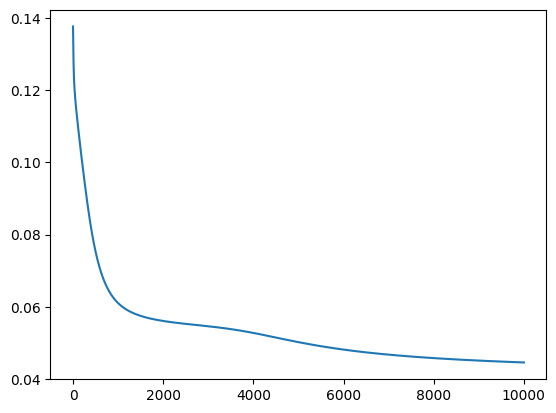

In [123]:
results.mse.plot()

<Axes: >

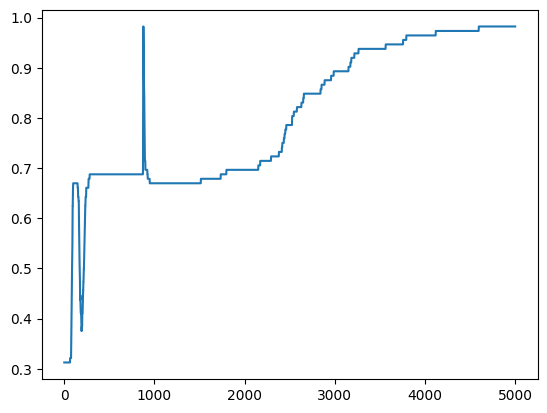

In [115]:
results.accuracy.plot()


In [116]:
#testing

Z1 = np.dot(xtest, w1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, w2)
A2 = sigmoid(Z2)

acc = accuracy(A2, ytest)
print(acc)



0.9473684210526315


In [126]:
# Prediction function
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    features = np.array([sepal_length, sepal_width, petal_length, petal_width])
    Z1 = np.dot(features, w1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, w2)
    A2 = sigmoid(Z2)
    predicted_class = A2.argmax()

    classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
    return classes[predicted_class]

# Example prediction
eg_sepal_length = 2.1
eg_sepal_width = 3.5
eg_petal_length = 1.4
eg_petal_width = 10

predicted_class = predict_iris(eg_sepal_length, eg_sepal_width, eg_petal_length, eg_petal_width)
print(f"Predicted Class: {predicted_class}")

Predicted Class: Iris Virginica
